In [3]:
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)
from config import api_key
import requests
import json
import pandas as pd
from pprint import pprint

In [4]:
city_id = []
from csv import reader
with open("log.csv", 'r', encoding='UTF-8') as reading_object:
    csv_reader = reader(reading_object)
    next(csv_reader)
    for i in csv_reader:
        city_id.append(i[2])

In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
response_list = []
unit = 'Imperial'
for x in city_id:
    base_url = url + "id=" + str(x) + "&appid=" + api_key + "&units=" + unit
    response = requests.get(base_url).json()
    response_list.append(response)

In [6]:
coord = []
hum = []
for x in response_list:
    coord.append((float(x['coord']['lon']), float(x['coord']['lat']) ) )
    hum.append(int(x['main']['humidity']) )

In [7]:
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [8]:
fig.add_layer(gmaps.heatmap_layer(coord, weights=hum))

In [9]:
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

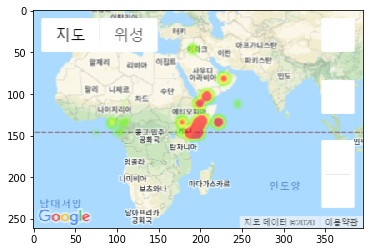

In [41]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
img = mpimg.imread('heatmap.png') 
plt.imshow(img) 

In [29]:
best_weather = []
best_weather_coord = []
for x in response_list:
    if 81 >= float(x['main']['temp_max']) >= 70 and float(x['wind']['speed']) < 5 and float(x['main']['humidity']) <= 40 \
    and float(x['clouds']['all'])==0:
        best_weather.append(x['name'])
        best_weather_coord.append(  x['coord']   ) 
print(best_weather)
print(best_weather_coord)
lat = best_weather_coord[0]['lat']
print(lat)
lon = best_weather_coord[0]['lon']
print(lon)

['Locoquicha', 'Scharendijke', 'Leutschach', 'Leutschach']
[{'lon': 22.17, 'lat': -10.4}, {'lon': 3.84, 'lat': 51.74}, {'lon': 15.47, 'lat': 46.67}, {'lon': 15.47, 'lat': 46.67}]
-10.4
22.17


In [30]:
counts = 0
hotel_data=[]
for x in best_weather_coord:
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    params = {
    "location": str(x['lat']) + "," + str(x['lon']),
#     "query": "Best Hotel",
    "keyword": "hotel",
    "radius": 5000,
    "type": "lodging",
    "key": gkey
}
    response = requests.get(base_url, params=params).json()
    if response['results'] != []:
        hotel_data.append(response)

    
    

In [31]:
# pprint(hotel_data)

In [32]:
h_name = []
h_city = []
h_loc = []
for x in hotel_data:
    h_name.append(x['results'][0]['name'])
    h_city.append(x['results'][0]['plus_code']['compound_code'])
    h_loc.append((float( x['results'][0]['geometry']['location']['lat'] ) , float( x['results'][0]['geometry']['location']['lng'] ) ))

In [33]:
# print(h_name)
# print(h_city)
# print(h_loc)

In [34]:
rcount = 0
names = []
for i in h_name:
    hotel_pinn = [{
        "name": h_name
        , "Zip, City, Country" : h_city
        , "location" : h_loc
    }]
    rcount += 1
pprint(hotel_pinn)

[{'Zip, City, Country': ['PQQX+QJ Renesse, Netherlands',
                         'PG6P+VG Sernau, Austria',
                         'PG6P+VG Sernau, Austria'],
  'location': [(51.7394, 3.799099999999999),
               (46.7121529, 15.536365),
               (46.7121529, 15.536365)],
  'name': ["Hotel 't Klokje", 'Hotel Villa Rosa', 'Hotel Villa Rosa']}]


In [35]:
h_dict = [{
    "Name" : "Hotel 't Klokje", "location" : (51.7394, 3.799099999999999), "City" : "Renesse", "Country" : "Netherlands",
    "Name" : 'Hotel Villa Rosa', "location" : (46.7121529, 15.536365), "City" : "Sernau", "Country" : "Austria"
}]
h_locations = [h['location'] for h in h_dict]
info_box_template = """
<dl>
<dt>Name</dt><dd>{Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
h_info = [info_box_template.format(**h) for h in h_dict]


In [36]:
marker_layer1 = gmaps.marker_layer(h_locations, info_box_content = h_info)

In [37]:
fig.add_layer(marker_layer1)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

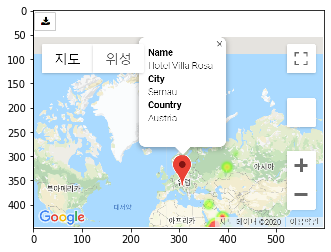

In [42]:
img2 = mpimg.imread('heatmap__with_marker_and_contentbox.png') 
plt.imshow(img2) 